<a href="https://colab.research.google.com/github/lustraka/Data_Analysis_Workouts/blob/main/Communicate_Data_Findings/SandBox/Multivariate_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Multivariate Exploration Pattern Language
 ## Basic Set Up & Color Palettes

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

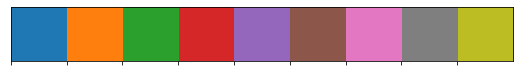

In [2]:
sns.palplot(sns.color_palette(n_colors=9)) # Qualitative, also deep, pastel, dark, muted, bright, colorblind

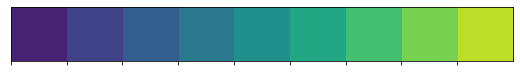

In [3]:
sns.palplot(sns.color_palette('viridis', 9)) # Sequential, also rocket, mako

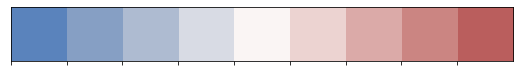

In [4]:
sns.palplot(sns.color_palette('vlag', 9)) # Diverging, also icefire

# Pokémon Exploration
**Task 1**: To start, let's look at the relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

In [5]:
# Read the csv file, and check its shape and head
path = 'https://github.com/lustraka/Data_Analysis_Workouts/raw/main/Communicate_Data_Findings/SandBox/'
pokemon = pd.read_csv(path + 'pokemon.csv')
print(pokemon.shape)
pokemon.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


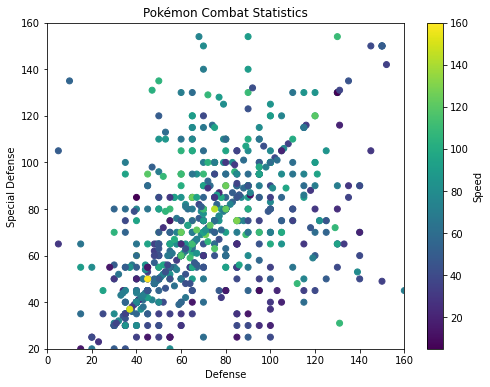

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(data=pokemon, x='defense', y='special-defense', c='speed')
cbar = plt.colorbar()
plt.xlim(0,160)
plt.ylim(20,160)
plt.xlabel('Defense')
plt.ylabel('Special Defense')
cbar.ax.set_ylabel('Speed')
plt.title('Pokémon Combat Statistics')
plt.show()

We see a slight increase in speed as both defense and special defense increase. However, the brightest points seem to be clumped up in the center in the 60-80 defense and special defense ranges with the two brightest points on the lower left of the diagonal.

To complete the second task, we need to first reshape the dataset so that all Pokémon types are recorded in a single column. This will add duplicates of Pokémon with two types, which is fine for the task to be performed.

In [7]:
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


**Task 2**: How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon? You may want to subset your dataframe before proceeding with the plotting code. **Hint**: If you remember from the univariate plots lesson, one of your axis variables may need to be transformed. If you plan on using FacetGrid, its `.set()` method will be vital for adjusting the axis scaling and tick marks. Check the [last example in the Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) for an example of how the `.set()` method is used, and the [matplotlib documentation of the Axes class](https://matplotlib.org/api/axes_api.html) for properties that you might want to set.

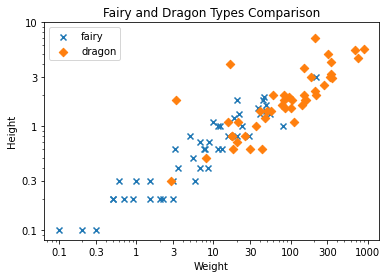

In [8]:
type_markers = [['fairy', 'x'], ['dragon', 'D']]
for ptype, marker in type_markers:
  df_type = pkmn_types.loc[pkmn_types['type'] == ptype]
  plt.scatter(data=df_type, x='weight', y='height', marker=marker)

# Set log scales for x and y axes
plt.xscale('log')
plt.yscale('log')

# Set the tick and labels
xticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
xticklables = [str(tick) for tick in xticks]
plt.xticks(xticks, xticklables)
yticks = [0.1, 0.3, 1, 3, 10]
yticklables = [str(tick) for tick in yticks]
plt.yticks(yticks, yticklables)

# Annotate the plot
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Fairy and Dragon Types Comparison')
plt.legend(['fairy', 'dragon'])
plt.show()

The plot shows the drastic difference in sizes and weights for the Fairy and Dragon Pokemon types.

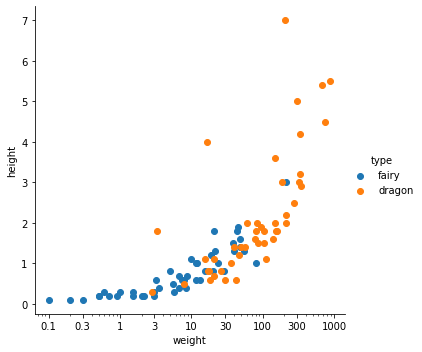

In [9]:
# Another solution
type_cols = ['type_1','type_2']
pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]
# plotting
g = sns.FacetGrid(data=pokemon_sub, hue='type', height=5)
g.map(plt.scatter, 'weight','height')
g.set(xscale = 'log') # need to set scaling before customizing ticks
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks = x_ticks, xticklabels = x_ticks)
g.add_legend()
plt.show()

## Fuel Economy Exploration

In [10]:
# Read the csv file, and check its shape and head
path = 'https://github.com/lustraka/Data_Analysis_Workouts/raw/main/Communicate_Data_Findings/SandBox/'
fuel_econ = pd.read_csv(path + 'fuel-econ.csv')
print(fuel_econ.shape)
fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task 1**: Plot the city ('*city*') vs. highway ('*highway*') fuel efficiencies (both in mpg) for each vehicle class ('*VClass*'). Don't forget that vehicle class is an ordinal variable with levels {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, Large Cars}.

In [11]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

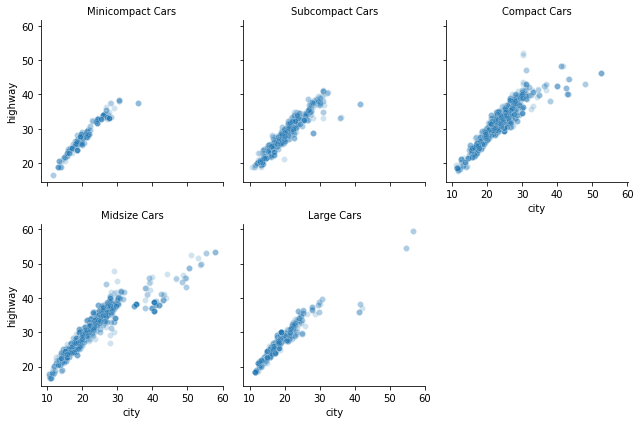

In [12]:
# Plot city vs highway fuel efficiencies for each vehicle class
sns.reset_orig() # Restore all RC params to original settings (see `set_style`).
g = sns.FacetGrid(data=fuel_econ, col='VClass', height=3, col_wrap=3)
g.map(sns.scatterplot, 'city', 'highway', alpha=0.2)
g.set_titles('{col_name}');

Due to overplotting, we've taken a faceting approach to this task. There don't seem to be any obvious differences in the main cluster across vehicle classes, except that the minicompact and large sedans' arcs are thinner than the other classes due to lower counts. The faceted plots clearly show that most of the high-efficiency cars are in the mid-size and compact car classes.

**Task 2**: Plot the relationship between engine size ('*displ*', in liters), vehicle class, and fuel type ('*fuelType*'). For the lattermost feature, focus only on Premium Gasoline and Regular Gasoline cars. What kind of relationships can you spot in this plot?

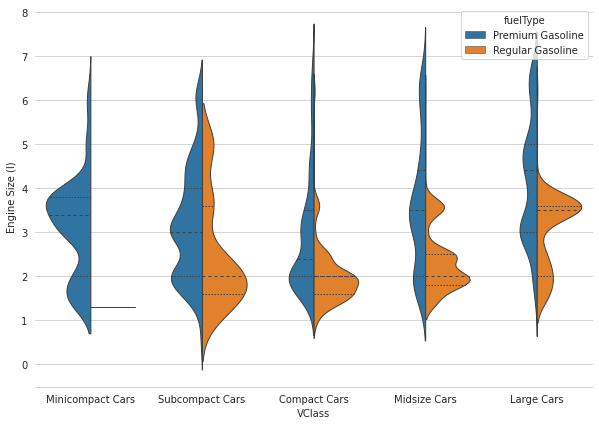

In [13]:
# Select subset of fuel_type
df = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]

# Violin plot
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
sns.violinplot(data=df, x='VClass', y='displ', hue='fuelType',
               split=True, inner='quartile', linewidth=1,
               #palette={'Premium Gasoline': 'b', 'Regular Gasoline': '0.85'}
               )
plt.ylabel('Engine Size (l)')
sns.despine(left=True);

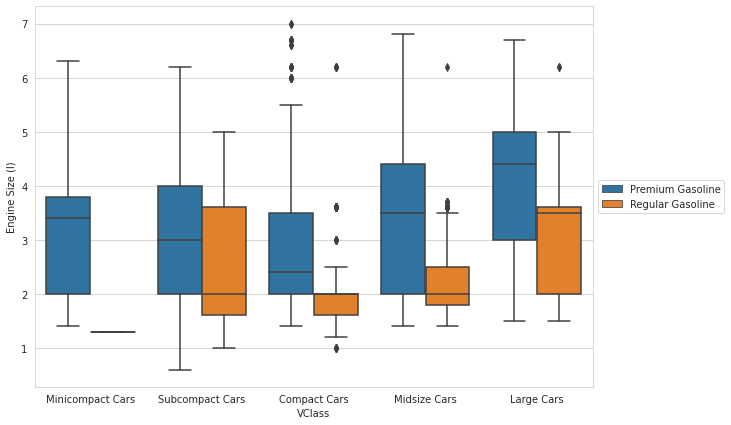

In [14]:
# Box plot
plt.figure(figsize=(10,7))
sns.boxplot(data=df, x='VClass', y='displ', hue='fuelType')
plt.legend(loc=6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.ylabel('Engine Size (l)');

Here, we went with a clustered box plot on this task since there were too many levels to make a clustered violin plot accessible. The plot shows that in each vehicle class, engine sizes were larger for premium-fuel cars than regular-fuel cars. Engine size generally increased with vehicle class within each fuel type, but the trend was noisy for the smallest vehicle classes.

**Task 3**: Practice creating a plot matrix, by depicting the relationship between five numeric variables in the fuel efficiency dataset: *'displ', 'co2', 'city', 'highway'*, and *'comb'*. Do you see any interesting relationships that weren't highlighted previously?

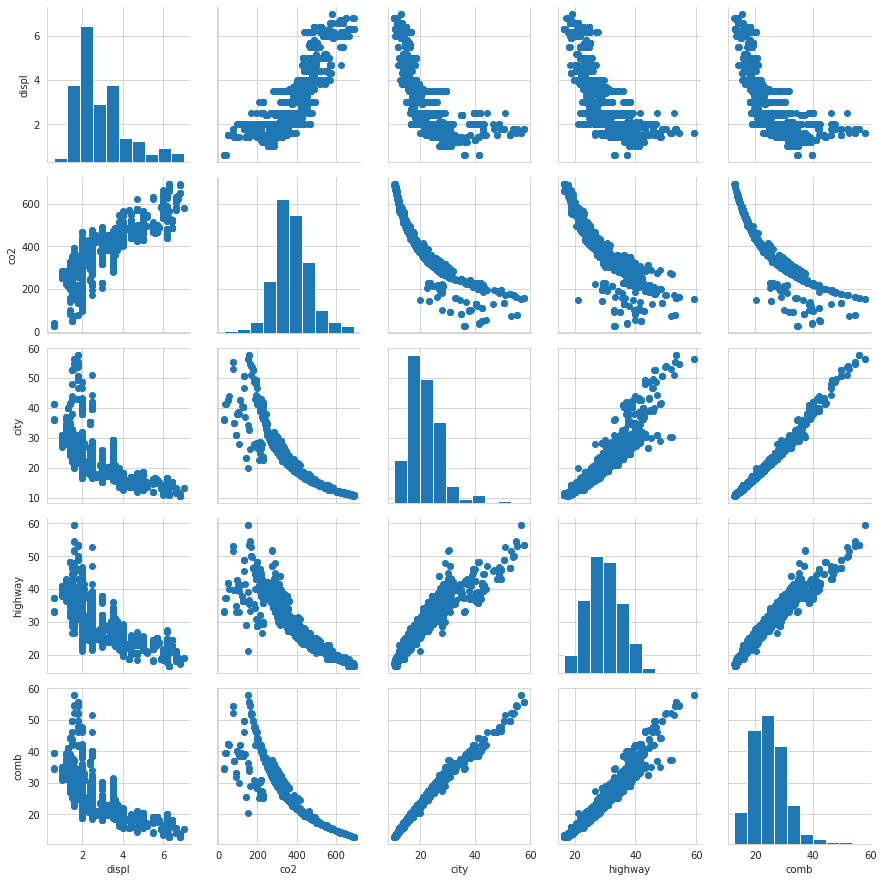

In [15]:
# PairGrid
g = sns.PairGrid(data=fuel_econ, vars=['displ', 'co2', 'city', 'highway', 'comb'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

We set up our PairGrid to plot scatterplots off the diagonal and histograms on the diagonal. The intersections where *'co2'* meets the fuel mileage measures are fairly interesting in how tight the curves are.

**Task 4**: The output of the preceding task pointed out a potentially interesting relationship between co2 emissions and overall fuel efficiency. Engineer a new variable that depicts CO2 emissions as a function of gallons of gas (g / gal). (The *'co2'* variable is in units of g / mi, and the *'comb'* variable is in units of mi / gal.) Then, plot this new emissions variable against engine size (*'displ'*) and fuel type (*'fuelType'*). For this task, compare not just Premium Gasoline and Regular Gasoline, but also Diesel fuel.

In [16]:
fuel_econ.fuelType.value_counts()

Premium Gasoline     2302
Regular Gasoline     1521
Diesel                 80
Midgrade Gasoline      23
Natural Gas             3
Name: fuelType, dtype: int64

In [17]:
# Select subset of fuel_type
df = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline', 'Diesel'])].copy()
df['co2_gal'] = df.co2 * df.comb

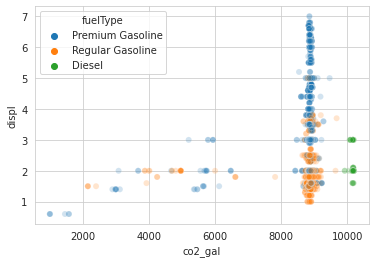

In [18]:
sns.scatterplot(data=df, x='co2_gal', y='displ', hue='fuelType', alpha=.2);

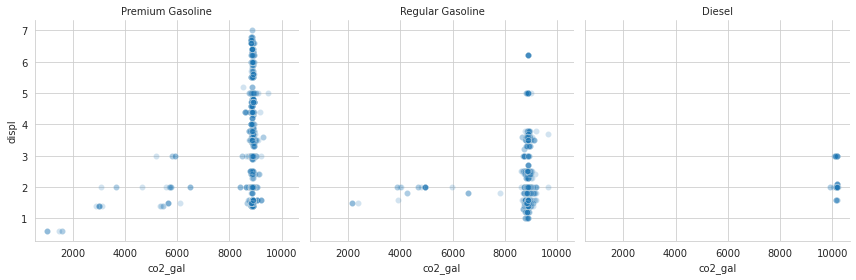

In [19]:
g = sns.FacetGrid(data=df, col='fuelType', height=4)
g.map(sns.scatterplot, 'co2_gal', 'displ', alpha=0.2)
g.set_titles('{col_name}');

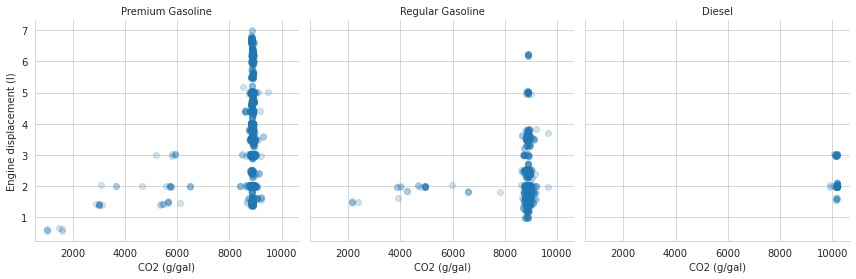

In [20]:
g = sns.FacetGrid(data=df, col='fuelType', height=4)
g.map(sns.regplot, 'co2_gal', 'displ', y_jitter=0.04, fit_reg=False, 
      scatter_kws={'alpha': 0.2})
g.set_titles('{col_name}');
g.set_ylabels('Engine displacement (l)')
g.set_xlabels('CO2 (g/gal)');

Due to the high number of data points and their high amount of overlap, we've chosen to plot the data in a faceted plot. You can see that engine sizes are smaller for cars that use regular gasoline against those that use premium gas. Most cars fall in an emissions band a bit below 9 kg CO2 per gallon; diesel cars are consistently higher, a little above 10 kg CO2 per gallon. This makes sense, since a gallon of gas gets burned no matter how efficient the process. More strikingly, there's a smattering of points with much smaller emissions. If you inspect these points more closely you'll see that they represent hybrid cars that use battery energy in addition to conventional fuel! To pull these mechanically out of the dataset requires more data than that which was trimmed to create it - and additional research to understand why these points don't fit the normal CO2 bands.